<a href="https://colab.research.google.com/github/derek881107/Hyperparameter-Tuning-with-Portuguese-bank-marketing-dataset/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Machine Learning Model Playground! 🎢**

Are you tired of data that looks like it went through a tornado before landing in your lap? Well, you're in luck! This project is your ultimate guide to transforming messy datasets into machine learning masterpieces. 🧹🤖

# **What Does This Project Do?**

This code takes you on an end-to-end journey of building and optimizing machine learning models for a **Portuguese bank marketing dataset**. Whether you're struggling with imbalanced data, endless hyperparameter tuning, or just figuring out what to do with all those "yes" and "no" columns, we’ve got you covered!

Introdution Video Link: https://www.youtube.com/watch?v=MlW7SlbG_9A


# **Here’s what this project tackles step-by-step:**

**Data Preprocessing:**

Cleans up messy datasets using one-hot encoding and SMOTE (because imbalanced data is like a one-sided coin—useless).
Scales features with StandardScaler to make sure every variable plays nice.

**Model Training:**

Builds Decision Trees and Random Forests to solve classification problems.
Integrates hyperparameter tuning techniques like RandomizedSearch, GridSearch, and even Bayesian optimization for the nerds out there.

**Evaluation & Insights:**

Evaluates performance with metrics like accuracy, precision, recall, F1-score, and the ever-popular ROC AUC.
Visualizes the results with ROC curves, because who doesn’t love a pretty graph? 📈

# **How Do We Solve Problems with Machine Learning?**

This project tackles the challenges of:

**Imbalanced Data:** Solved with SMOTE, which generates synthetic samples to balance the dataset.

**Hyperparameter Tuning:** Uses a mix of search techniques (random, grid, bayesian) to find the best model configuration.
Data Scaling: Applies StandardScaler to normalize features, ensuring fair comparisons.

**Model Comparison:** Provides clear metrics and visualizations to choose the best-performing model for your data.

# **Technologies Used**

**Python**:The engine powering everything.

**Pandas & NumPy** :For cleaning and transforming data like a pro.

**Scikit-Learn:** For building, tuning, and evaluating machine learning models.

**SMOTE**: To address imbalanced datasets with ease.

**Matplotlib & Seaborn: **Because no machine learning project is complete without beautiful visualizations.


# **Ready to Dive In?**
Fork it, clone it, and let the machine learning magic begin! 🚀
And remember, the only thing better than finding insights in your data is doing it with style (and minimal stress). 😎



**1. Install Required Libraries**

This section installs the required Python libraries, such as imbalanced-learn for handling imbalanced datasets and scikit-optimize for Bayesian optimization, which might not be pre-installed in Google Colab.

In [1]:
# Install necessary libraries in Colab
!pip install imbalanced-learn scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


**2. Import Libraries**

This section imports all necessary libraries for data processing, model training, hyperparameter tuning, visualization, and evaluation.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import files


**3. Upload Data Files**

This section allows you to manually upload your dataset files (Portugese Bank Data-TRAIN.csv and Portugese Bank Data-TEST.csv) to the Colab environment.

In [5]:
# Upload files manually
uploaded = files.upload()


Saving Portugese Bank Data-TRAIN.csv to Portugese Bank Data-TRAIN (1).csv
Saving Portugese Bank Data-TEST.csv to Portugese Bank Data-TEST.csv


**4. Load and Preprocess Data**

This section defines a function to load and preprocess the data by encoding categorical variables and converting the target variable (y) into binary format. It then loads the training and testing datasets.

In [6]:
# Load and preprocess data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
    data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
                                         'contact', 'month', 'poutcome'], drop_first=True)
    return data

# Replace file names with uploaded file names
train_data = load_and_preprocess('Portugese Bank Data-TRAIN.csv')
test_data = load_and_preprocess('Portugese Bank Data-TEST.csv')

X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']


**5. Balance and Standardize Data**

This section balances the training data using SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance. It then standardizes the features for consistency in model training.

In [7]:
# Balance data using SMOTE and standardize features
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**6. Define Hyperparameters**

This section defines the hyperparameter grids for Decision Tree and Random Forest models to be used during hyperparameter tuning.

In [8]:
# Define models and hyperparameters for tuning
def get_model_params():
    dt_params = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'class_weight': [None, 'balanced']
    }
    rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    return dt_params, rf_params

dt_params, rf_params = get_model_params()


**7. Hyperparameter Tuning Function**

This function performs hyperparameter tuning using one of three methods: RandomizedSearchCV, GridSearchCV, or BayesSearchCV, to find the best parameters for a given model.

In [9]:
# Hyperparameter tuning function
def tune_model(model, param_dist, search_method, X, y):
    if search_method == 'random':
        search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    elif search_method == 'grid':
        search = GridSearchCV(model, param_dist, cv=5, scoring='accuracy')
    elif search_method == 'bayes':
        search = BayesSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    search.fit(X, y)
    return search


**8. Tune Models**

This section applies the hyperparameter tuning function to Decision Tree and Random Forest models using RandomizedSearch, GridSearch, and Bayesian optimization methods.

In [10]:
# Tune models
dt_random_search = tune_model(DecisionTreeClassifier(random_state=42), dt_params, 'random', X_train, y_train)
rf_random_search = tune_model(RandomForestClassifier(random_state=42), rf_params, 'random', X_train, y_train)

dt_grid_search = tune_model(DecisionTreeClassifier(random_state=42), dt_params, 'grid', X_train, y_train)
rf_grid_search = tune_model(RandomForestClassifier(random_state=42), rf_params, 'grid', X_train, y_train)

dt_bayes_params = {
    'max_depth': [5, 20],
    'min_samples_split': Integer(2, 15),
    'min_samples_leaf': Integer(1, 10),
    'class_weight': [None, 'balanced']
}
rf_bayes_params = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(10, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['sqrt', 'log2'])
}

dt_bayes_search = tune_model(DecisionTreeClassifier(random_state=42), dt_bayes_params, 'bayes', X_train, y_train)
rf_bayes_search = tune_model(RandomForestClassifier(random_state=42), rf_bayes_params, 'bayes', X_train, y_train)


/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [5, 20] was inferred to Integer(low=5, high=20, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(5, 20), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [5, 20] was inferred to Integer(low=5, high=20, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(5, 20), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [5, 20] was inferred to Integer(low=5, high=20, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to C

**9. Model Evaluation**

This section compiles the tuned models and evaluates their performance on the test data using various metrics, including accuracy, precision, recall, F1-score, and ROC AUC.

In [11]:
# Compile tuned models
models = {
    'DT_Random': DecisionTreeClassifier(**dt_random_search.best_params_, random_state=42),
    'DT_Grid': DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42),
    'DT_Bayes': DecisionTreeClassifier(**dt_bayes_search.best_params_, random_state=42),
    'RF_Random': RandomForestClassifier(**rf_random_search.best_params_, random_state=42),
    'RF_Grid': RandomForestClassifier(**rf_grid_search.best_params_, random_state=42),
    'RF_Bayes': RandomForestClassifier(**rf_bayes_search.best_params_, random_state=42)
}

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob) if y_pred_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if fpr is not None else None
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc
    }

# Collect evaluation results
results = {name: evaluate_model(model.fit(X_train, y_train), X_test, y_test) for name, model in models.items()}
results_df = pd.DataFrame(results).T
print("Evaluation Results:\n", results_df)


Evaluation Results:
            Accuracy  Precision    Recall  F1-Score   ROC AUC
DT_Random  0.877994   0.886084  0.877994  0.881658  0.737450
DT_Grid    0.877994   0.886084  0.877994  0.881658  0.737450
DT_Bayes   0.881688   0.885298  0.881688  0.883407  0.828088
RF_Random  0.904315   0.895224  0.904315  0.898240  0.919870
RF_Grid    0.906107   0.897110  0.906107  0.899972  0.921532
RF_Bayes   0.903807   0.895121  0.903807  0.898140  0.918944


**10. Visualization**

This section visualizes the ROC curves for all models, helping to compare their performance in terms of true positive and false positive rates.


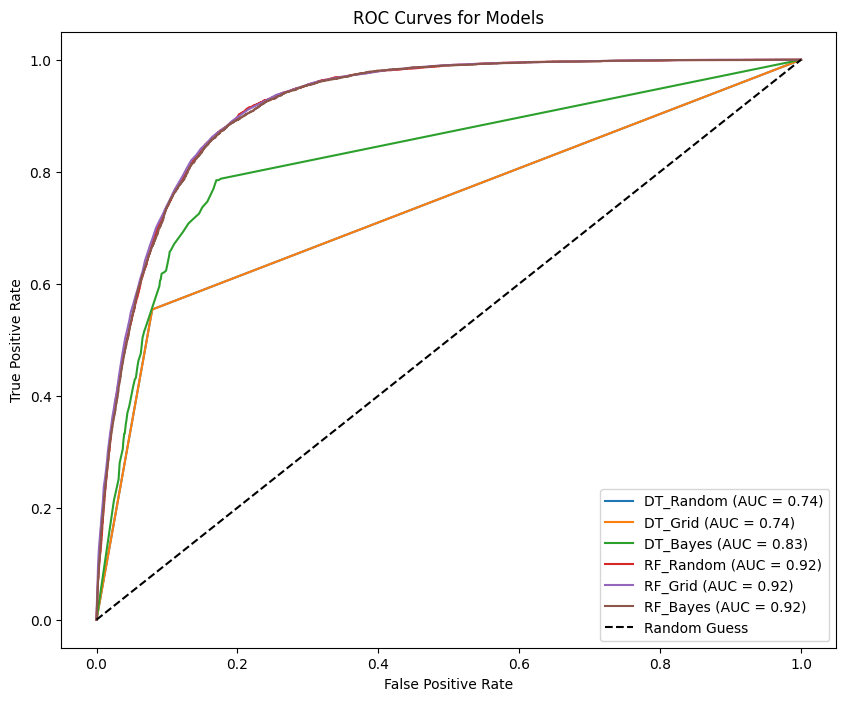

In [12]:
# ROC Curve Plot
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()
